In [7]:
pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     -------------------------------------  41.0/42.0 kB 140.3 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 144.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 M

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




In [11]:
f=open(r"text.txt","r")
data=f.read()
f.close()

In [12]:
ds=[]
for d in data.split("\n"):
    ds.append(d.split("] "))

In [13]:
def preprocess_text(text):
    text = text.lower()  
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word not in string.punctuation]  
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [14]:
target=['joy','fear','anger','sadness','disgust','shame','guilt']
for i in range(len(ds)):
    tar=[]
    for v in ds[i][0]:
        if v.isdecimal():
            tar.append(float(v))
    ds[i][0]=tar
print(ds[:5])

[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'During the period of falling in love, each time that we met and especially when we had not met for a long time.'], [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'When I was involved in a traffic accident.'], [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'When I was driving home after  several days of hard work, there was a motorist ahead of me who was driving at 50 km/hour and refused, despite his low speeed to let me overtake.'], [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'When I lost the person who meant the most to me.'], [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], "The time I knocked a deer down - the sight of the animal's injuries and helplessness.  The realization that the animal was so badly hurt that it had to be put down, and when the animal screamed at the moment of death."]]


In [103]:
nltk.download('punkt')
nltk.download('stopwords')
X,y=[],[]
for v in ds:
    if len(v)!=2:
        print(v)
        continue
    X.append(preprocess_text(v[1]))
    y.append(v[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[]]


In [104]:
len(X),len(y)
y[7].index(1)

0

In [105]:
labels = []
count = 0
positive = "joy"
negative = ['disgust', 'sadness', 'fear', 'anger', 'shame', 'guilt']
pos = [1.0, 0.0]
neg = [0.0, 1.0]
for v in y:
    labels.append(target[v.index(1)])
    if(labels[count] in negative):
        labels[count] = "Negative"
        y[count] = neg
    else:
        labels[count] = "Positive"
        y[count] = pos
    count += 1
labels

['Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',

<Axes: >

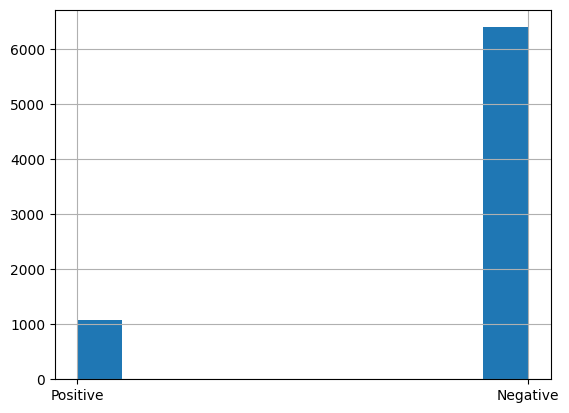

In [106]:
df = pd.DataFrame(data=X)
df.rename({0:"content"},axis=1,inplace=True)
df['labels']=labels
df['labels'].hist()

In [107]:
df['labels'].value_counts()

labels
Negative    6396
Positive    1084
Name: count, dtype: int64

In [108]:
nums = [v.index(1) for v in y]

In [109]:
print(nums)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

In [110]:
tfidf = TfidfVectorizer()
X_mod = tfidf.fit_transform(X)

In [111]:
print(X_mod)

  (0, 4632)	0.2649121833340404
  (0, 2738)	0.34921593252459837
  (0, 4914)	0.5545060808602135
  (0, 7973)	0.38890528398147745
  (0, 4663)	0.2742101783920608
  (0, 2948)	0.3867188095908672
  (0, 5715)	0.3527078030712056
  (1, 151)	0.49196776085081484
  (1, 8059)	0.6526456771517076
  (1, 4213)	0.5762129314573082
  (2, 5526)	0.2810109885001428
  (2, 4522)	0.19755659383718144
  (2, 7351)	0.3119937294264151
  (2, 4671)	0.22157215042161688
  (2, 2198)	0.21931710024351125
  (2, 6409)	0.1942817892767744
  (2, 3831)	0.20986343553675796
  (2, 4394)	0.26511865196025036
  (2, 86)	0.25757344976706037
  (2, 311)	0.25757344976706037
  (2, 5088)	0.3119937294264151
  (2, 8737)	0.15837029933579047
  (2, 3640)	0.2011829106456576
  (2, 2023)	0.17440682893385873
  (2, 6981)	0.17711333068992705
  :	:
  (7477, 7310)	0.2898243264231469
  (7477, 7370)	0.30339473376192544
  (7477, 2424)	0.21979695646936162
  (7477, 3833)	0.1807094110960439
  (7477, 4886)	0.25065040873560657
  (7477, 5490)	0.23804326773529794
  

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X_mod,nums,test_size=0.4,random_state=42)



In [113]:
print()

In [114]:
print(X_train)

  (0, 504)	0.4405200879367854
  (0, 3948)	0.4405200879367854
  (0, 6713)	0.39677395309472857
  (0, 514)	0.28879142086475973
  (0, 6632)	0.4074274144311328
  (0, 1898)	0.363681279589076
  (0, 5076)	0.19141574905392145
  (0, 3785)	0.19013913192546514
  (1, 7115)	0.2930820343881719
  (1, 383)	0.3345269297953012
  (1, 1542)	0.4180424555824088
  (1, 5475)	0.2277269473182763
  (1, 2303)	0.2960650756007727
  (1, 8555)	0.18350490698273983
  (1, 361)	0.23656757773481216
  (1, 4406)	0.18726587202312153
  (1, 8617)	0.19870774563040658
  (1, 3293)	0.2518025629732404
  (1, 557)	0.37329634479188495
  (1, 352)	0.19234553739927568
  (1, 5726)	0.16931824226955838
  (1, 4522)	0.2351794182494613
  (2, 6869)	0.314477923496396
  (2, 5430)	0.23749448598012035
  (2, 3810)	0.2842726085410663
  :	:
  (4484, 5635)	0.28912881791858047
  (4484, 672)	0.2851593453240929
  (4484, 3908)	0.4048763459640749
  (4484, 1470)	0.28004925327441754
  (4484, 3293)	0.1952415641151207
  (4485, 3249)	0.5413068815292894
  (4485, 2

In [115]:

lr = LogisticRegression()
svm = SVC()
mnb = MultinomialNB()

In [116]:
lr.fit(X_train,y_train)

LogisticRegression()

In [117]:
accuracy_score(lr.predict(X_test),y_test),accuracy_score(lr.predict(X_train),y_train)

(0.8826871657754011, 0.9073083778966132)

In [118]:
svm.fit(X_train,y_train)

SVC()

In [119]:
accuracy_score(svm.predict(X_test),y_test)

0.8937165775401069

In [120]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
accuracy_score(dt.predict(X_test),y_test),accuracy_score(dt.predict(X_train),y_train)

(0.8663101604278075, 0.999554367201426)

In [122]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
accuracy_score(rf.predict(X_test),y_test),accuracy_score(rf.predict(X_train),y_train)

(0.8953877005347594, 0.999554367201426)

In [124]:
print(classification_report(rf.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       629
           1       1.00      1.00      1.00      3859

    accuracy                           1.00      4488
   macro avg       1.00      1.00      1.00      4488
weighted avg       1.00      1.00      1.00      4488



In [125]:
print(classification_report(rf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.38      0.85      0.52       200
           1       0.99      0.90      0.94      2792

    accuracy                           0.90      2992
   macro avg       0.68      0.87      0.73      2992
weighted avg       0.95      0.90      0.91      2992

